(1) 1 주차 과제 의 데이터를 가지고 선형회귀에 필요한 EDA 및 전처리 및 인코딩
-
범주형 변수 인코딩 3 개 이상 , EDA 3 개 이상
* 1주차 과제 적극적으로 활용 가능 및 자신이 만든 Feature 역시 사용 가능

(2)선형회귀분석을 배웠으니 1 주차 데이터를 다양한 방식으로 선형회귀분석 ! (Target: Hammer price)

(3)적합된 회귀식에 대해 데이터의 행렬을 통해 < MSE > 구하여 위의 값과 비교 (24 25 참고
* (3)번의 경우 , sklearn 을 사용하지 않고 행렬을 통해 값 추출하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Pandas 출력 최대치 설정, 열41개, 행 20개
pd.set_option('max_columns', 41,'max_rows', 20) 

In [3]:
df = pd.read_csv('Auction_master_train.csv')
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [4]:
# 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [5]:
#결측치 있는 열 확인 (덧셈은 행들의 값을 더해야하니까 axis=0)
df.isnull().sum(axis=0)

Auction_key                     0
Auction_class                   0
Bid_class                       0
Claim_price                     0
Appraisal_company               0
Appraisal_date                  0
Auction_count                   0
Auction_miscarriage_count       0
Total_land_gross_area           0
Total_land_real_area            0
                             ... 
Specific                     1869
Share_auction_YorN              0
road_name                       0
road_bunji1                    24
road_bunji2                  1778
Close_date                      0
Close_result                    0
point.y                         0
point.x                         0
Hammer_price                    0
Length: 41, dtype: int64

In [6]:
# 결측값이 있는 모든 열을 제거 
# 결측치가 제거된 데이터를 df_delete에 집어넣음.
df = df.dropna(axis=1)

In [7]:
#격측값이 있는 열이 다 제거된 것을 볼수 있음.
df.isnull().sum(axis=0)

Auction_key                  0
Auction_class                0
Bid_class                    0
Claim_price                  0
Appraisal_company            0
Appraisal_date               0
Auction_count                0
Auction_miscarriage_count    0
Total_land_gross_area        0
Total_land_real_area         0
                            ..
Preserve_regist_date         0
Total_floor                  0
Current_floor                0
Share_auction_YorN           0
road_name                    0
Close_date                   0
Close_result                 0
point.y                      0
point.x                      0
Hammer_price                 0
Length: 35, dtype: int64

In [8]:
# Hammer_price<1000000000 인 version

df= df.query('Hammer_price<1000000000')

### Encoding

In [9]:
df.Auction_class.value_counts()

임의    1308
강제     461
Name: Auction_class, dtype: int64

In [10]:
def encoding (x):
    if x == '임의':
        return 1
    else:
        return 0

In [11]:
df.Auction_class = df.Auction_class.apply(encoding)

In [12]:
df.Auction_class.value_counts()

1    1308
0     461
Name: Auction_class, dtype: int64

In [13]:
def transform(x):
    if x == '배당':
        return 1
    else:
        return 0

In [14]:
df['Close_result'] = df['Close_result'].apply(transform)

In [15]:
# 판정가(Total_appraisal_price) 와 hammer_price 의 차이
# 감정가격보다 얼마나 더 이득을 얻었는지
df['Gain']= df['Total_appraisal_price']-df['Hammer_price']

In [16]:
# 이득의 정도를 + 면 1 - 면 0으로 나타내보자.

def transform_to_number(x):
    if x > 0:
        return 1
    else:
        return 0
    
df['gain_or_loss'] = df['Gain'].apply(transform_to_number)

#### - Bid_class one hot  encoding

In [17]:
df.Bid_class.value_counts()

일반    1647
개별     117
일괄       5
Name: Bid_class, dtype: int64

In [18]:
# pd.get_dummies로 One-hot 인코딩
one_hot = pd.get_dummies(df['Bid_class'])

In [19]:
one_hot.head()

,개별,일괄,일반
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [20]:
#인코딩 했으니까 Bid_class 열을 없애줌
df = df.drop('Bid_class',axis = 1)

In [21]:
# Join the encoded df
df = df.join(one_hot)

In [22]:
# 최종경매일과 최초 경매일 일수의 차이를 보고싶었다
# 일수가 높다는것은 잘 안팔렸다는것이 아닐까!

df['date'] = pd.to_datetime(df.Final_auction_date)-pd.to_datetime(df.First_auction_date)
df.date = df.date.apply(lambda x: int(str(x).split(' ')[0]))

In [23]:
# 연도를 추출해보자.
# 연도별로 어떤 경향을 보일수도 있을거라 생각했다.

df['year'] = pd.DatetimeIndex(df['Final_auction_date']).year

In [24]:
df.head()

,Auction_key,Auction_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price,Gain,gain_or_loss,개별,일괄,일반,date,year
0,2687,1,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,1,35.162717,129.137048,760000000,76000000,1,1,0,0,35,2018
1,2577,1,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,1,35.156633,129.145068,971889999,101110001,1,0,0,1,35,2017
2,2197,1,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,1,35.184601,128.996765,93399999,25600001,1,1,0,0,77,2017
3,2642,1,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,1,35.154180,129.089081,256899000,31501000,1,0,0,1,105,2017
4,1958,0,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,1,35.099630,128.998874,158660000,11340000,1,0,0,1,28,2016


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1769 non-null int64
Auction_class                  1769 non-null int64
Claim_price                    1769 non-null int64
Appraisal_company              1769 non-null object
Appraisal_date                 1769 non-null object
Auction_count                  1769 non-null int64
Auction_miscarriage_count      1769 non-null int64
Total_land_gross_area          1769 non-null float64
Total_land_real_area           1769 non-null float64
Total_land_auction_area        1769 non-null float64
Total_building_area            1769 non-null float64
Total_building_auction_area    1769 non-null float64
Total_appraisal_price          1769 non-null int64
Minimum_sales_price            1769 non-null int64
First_auction_date             1769 non-null object
Final_auction_date             1769 non-null object
Final_result                   1769 non-null object
Creditor   

### EDA

In [26]:
X = df.drop('Hammer_price', axis=1)
X = X.drop('Close_result', axis=1)
X = X.drop('Appraisal_company' ,axis=1)
X = X.drop('Appraisal_date', axis=1)

X = X.drop('First_auction_date',axis=1)           
X = X.drop('Final_auction_date' ,axis=1)            
X = X.drop('Final_result',axis=1)
X = X.drop('Creditor',axis=1)
X = X.drop('addr_do',axis=1)
X = X.drop('addr_si',axis=1)
X = X.drop('addr_dong',axis=1)
X = X.drop('addr_san',axis=1)
X = X.drop('addr_etc',axis=1)
X = X.drop('Apartment_usage',axis=1)
X = X.drop('Preserve_regist_date',axis=1) 
X = X.drop('Share_auction_YorN',axis=1)
X = X.drop('road_name',axis=1)
X = X.drop('Close_date',axis=1)
y = df.Hammer_price

In [27]:
X.shape, y.shape

((1769, 23), (1769,))

In [28]:
X.corr()

,Auction_key,Auction_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Gain,gain_or_loss,개별,일괄,일반,date,year
Auction_key,1.000000,-0.008237,-0.095159,-0.025159,-0.016255,-0.006512,-0.078778,-0.053132,-0.111143,-0.075268,-0.518902,-0.511609,0.202470,0.147381,-0.813373,0.831520,-0.102040,0.070690,-0.053584,0.004776,0.051553,-0.119715,0.188381
Auction_class,-0.008237,1.000000,0.052913,-0.068472,-0.072400,0.046340,0.096549,0.149314,0.097716,0.160965,0.127295,0.126256,0.083984,0.006219,0.026768,-0.030166,0.005895,0.034490,-0.152913,-0.016907,0.153516,-0.060600,0.012132
Claim_price,-0.095159,0.052913,1.000000,0.015952,0.019686,-0.004643,0.036844,0.042378,0.084333,0.088046,0.114531,0.093090,-0.017586,0.005676,0.071846,-0.079047,0.053931,-0.025358,0.250550,-0.007664,-0.244129,0.045925,0.008767
Auction_count,-0.025159,-0.068472,0.015952,1.000000,0.973272,-0.035537,0.005161,0.005929,0.113233,0.103014,0.033965,-0.184859,-0.073762,-0.043165,-0.054167,0.051592,0.590931,0.558511,0.184088,0.009057,-0.182447,0.536455,0.011273
Auction_miscarriage_count,-0.016255,-0.072400,0.019686,0.973272,1.000000,-0.039538,0.013984,0.014011,0.137851,0.124904,0.045531,-0.180500,-0.063680,-0.032441,-0.057774,0.054494,0.601114,0.609450,0.195428,0.013202,-0.194438,0.526940,0.016003
Total_land_gross_area,-0.006512,0.046340,-0.004643,-0.035537,-0.039538,1.000000,0.162871,0.156497,0.084283,0.079168,0.127653,0.134719,0.124820,0.112475,0.005011,-0.004962,-0.006092,-0.012536,-0.058736,-0.016873,0.061142,-0.024248,0.013660
Total_land_real_area,-0.078778,0.096549,0.036844,0.005161,0.013984,0.162871,1.000000,0.959750,0.557142,0.519557,0.403807,0.380397,-0.124351,-0.094031,0.066618,-0.068047,0.137694,0.061701,-0.183625,0.060851,0.167347,-0.023747,0.009423
Total_land_auction_area,-0.053132,0.149314,0.042378,0.005929,0.014011,0.156497,0.959750,1.000000,0.534247,0.586911,0.426151,0.402250,-0.111290,-0.090888,0.047759,-0.049117,0.142672,0.059543,-0.170426,0.063086,0.153933,-0.017975,-0.007266
Total_building_area,-0.111143,0.097716,0.084333,0.113233,0.137851,0.084283,0.557142,0.534247,1.000000,0.940041,0.652806,0.594555,0.295785,0.197232,0.043150,-0.043381,0.324845,0.163046,-0.125034,0.027783,0.116810,0.099576,-0.031732
Total_building_auction_area,-0.075268,0.160965,0.088046,0.103014,0.124904,0.079168,0.519557,0.586911,0.940041,1.000000,0.666133,0.610539,0.289960,0.184389,0.017734,-0.017891,0.315662,0.149777,-0.107740,0.030475,0.099284,0.098650,-0.051498


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769 entries, 0 to 1932
Data columns (total 23 columns):
Auction_key                    1769 non-null int64
Auction_class                  1769 non-null int64
Claim_price                    1769 non-null int64
Auction_count                  1769 non-null int64
Auction_miscarriage_count      1769 non-null int64
Total_land_gross_area          1769 non-null float64
Total_land_real_area           1769 non-null float64
Total_land_auction_area        1769 non-null float64
Total_building_area            1769 non-null float64
Total_building_auction_area    1769 non-null float64
Total_appraisal_price          1769 non-null int64
Minimum_sales_price            1769 non-null int64
Total_floor                    1769 non-null int64
Current_floor                  1769 non-null int64
point.y                        1769 non-null float64
point.x                        1769 non-null float64
Gain                           1769 non-null int64
gain_or_loss

C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44292 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)


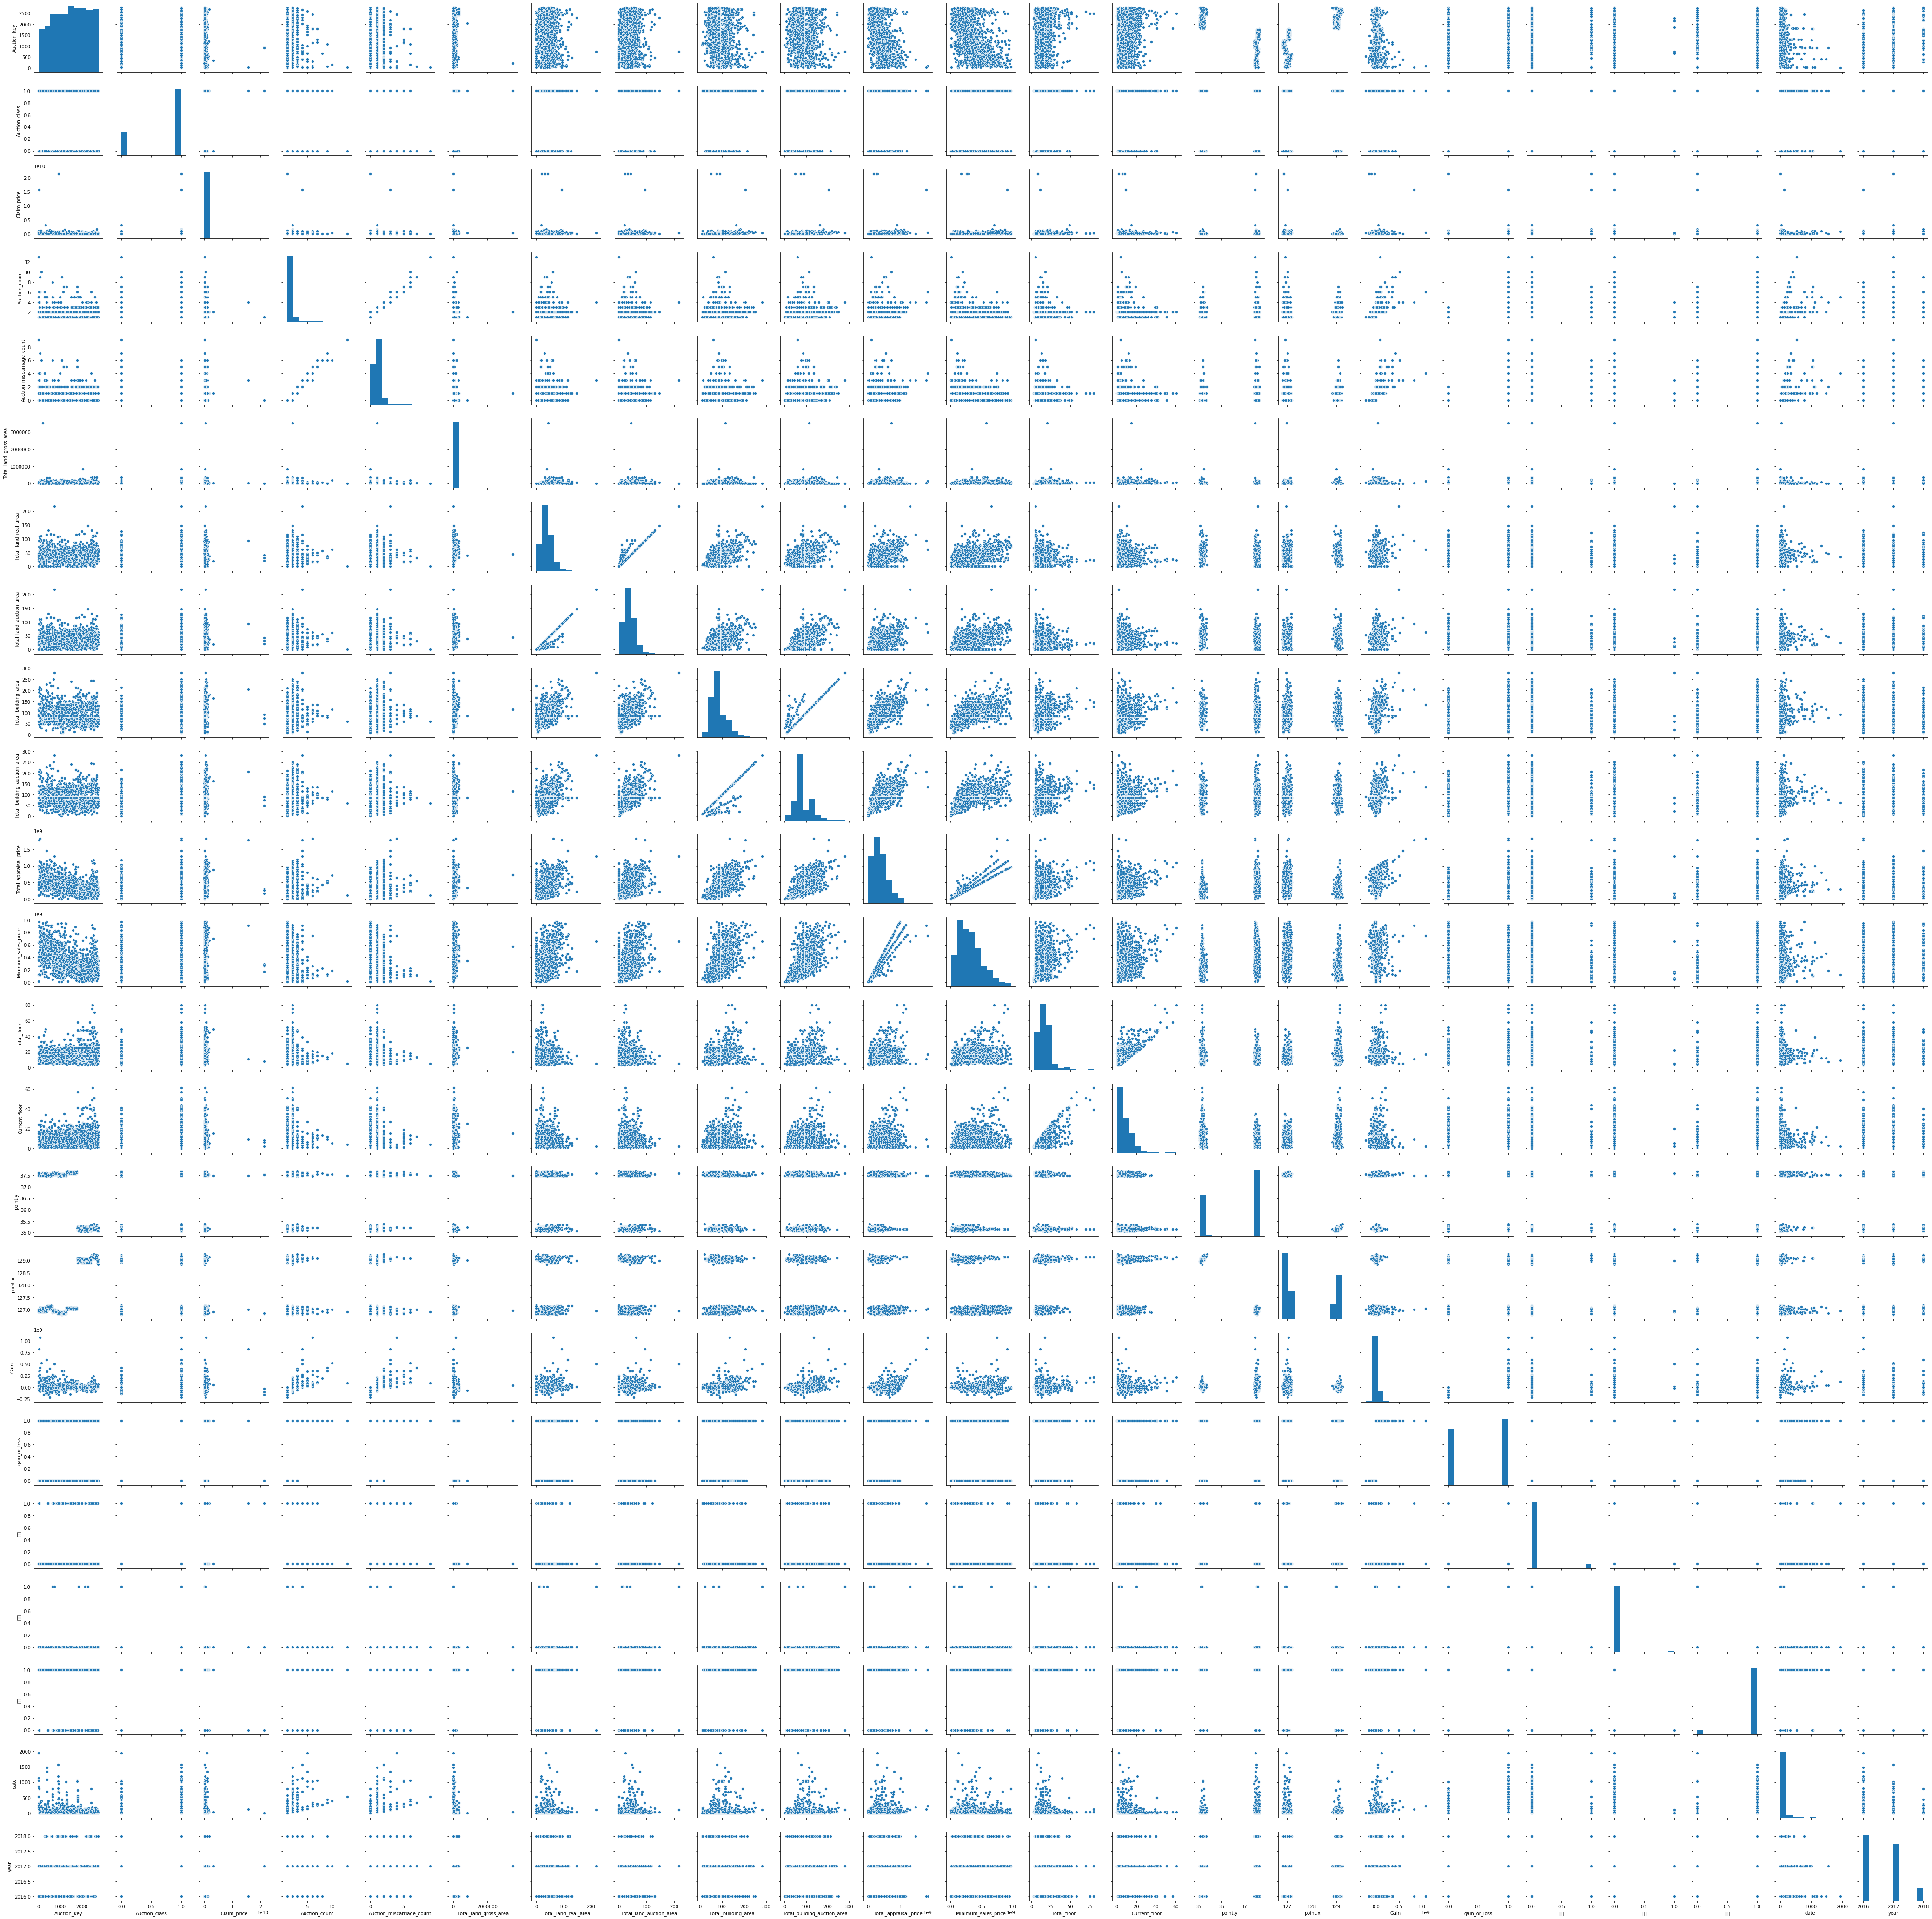

In [30]:
sns.pairplot(X)

13,14 번째랑 5,6 번째 상관관계 높게 나왔다.

In [31]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
22,1.113275e+07,year
20,9.670090e+05,일반
18,9.300797e+05,개별
19,4.245946e+04,일괄
15,1.021841e+02,point.x
14,9.256692e+01,point.y
7,8.980786e+01,Total_land_auction_area
6,8.576218e+01,Total_land_real_area
10,6.743060e+01,Total_appraisal_price
9,6.301830e+01,Total_building_auction_area


: 다중공선성이 있다고 판단되는 변수들을 제거하자
> 다중공선성은 해당 설명변수들이 바뀔때 마다 그 값이 지속적으로 바뀌게 되니까 제거하면서 계속 변수들을 확인해보자.

In [32]:
X = X.drop('일반',axis=1)
X = X.drop('개별',axis=1)
X = X.drop('Total_land_auction_area',axis=1)
X = X.drop('Total_building_auction_area',axis=1)

In [33]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
18,1.794946e+06,year
13,7.337656e+01,point.x
12,7.003225e+01,point.y
8,6.516255e+01,Total_appraisal_price
9,5.826859e+01,Minimum_sales_price
4,2.337363e+01,Auction_miscarriage_count
3,2.039915e+01,Auction_count
14,4.130874e+00,Gain
0,3.888317e+00,Auction_key
7,2.688442e+00,Total_building_area


In [34]:
X = X.drop('Total_appraisal_price',axis=1)
X = X.drop('point.x',axis=1)

In [35]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
16,3471.981774,year
4,22.186706,Auction_miscarriage_count
3,20.306411,Auction_count
0,3.659317,Auction_key
8,3.171523,Minimum_sales_price
11,3.157972,point.y
7,2.680575,Total_building_area
9,2.306110,Total_floor
12,1.870345,Gain
6,1.854918,Total_land_real_area


In [36]:
X = X.drop('year',axis=1)
X = X.drop('Auction_count',axis=1)
X = X.drop('Total_building_area',axis=1)

In [37]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
9,18.702601,point.y
7,10.272472,Total_floor
6,9.125395,Minimum_sales_price
0,7.839965,Auction_key
5,6.517130,Total_land_real_area
3,5.521772,Auction_miscarriage_count
8,4.235098,Current_floor
1,4.011862,Auction_class
11,3.820195,gain_or_loss
10,1.881061,Gain


In [38]:
X = X.drop('point.y',axis=1)

In [39]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
7,10.152621,Total_floor
6,7.085919,Minimum_sales_price
5,6.308189,Total_land_real_area
0,5.887990,Auction_key
3,5.082339,Auction_miscarriage_count
8,4.227781,Current_floor
10,3.783927,gain_or_loss
1,3.699633,Auction_class
12,1.759026,date
9,1.750560,Gain


## 2. 선형회귀분석

In [40]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
# 0~1 범위에 들도록

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train_scale, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#fit된 모델의 R-square
model.score(X_train_scale, y_train)

0.9824887766700192

In [44]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[-2.31626039e+07  4.91912641e+06  6.76403345e+07  2.56528172e+08
  8.94122398e+06  5.05494127e+07  1.06735008e+09  4.61709243e+07
 -2.56790677e+06 -3.87677815e+08  8.55341820e+06  3.11429416e+07
 -4.58413318e+07]
65968523.09934199


In [45]:
#test데이터 예측
model.predict(X_test_scale)

array([1.65738358e+08, 4.60589009e+08, 2.19601656e+08, 4.08121594e+08,
       7.80014901e+08, 9.76738518e+08, 1.47100889e+08, 2.78991789e+08,
       1.67246504e+08, 1.09555024e+09, 8.09529040e+07, 2.35575063e+08,
       5.65379487e+08, 4.23130241e+07, 2.82732854e+08, 4.56090143e+08,
       2.42393698e+08, 4.15319018e+08, 4.74972095e+08, 6.91100623e+07,
       3.96987069e+08, 2.35362260e+07, 2.78302525e+08, 5.42208129e+08,
       2.73109992e+08, 5.50982016e+08, 4.04291941e+08, 1.63105951e+08,
       1.44295007e+08, 2.18330852e+08, 1.17661152e+09, 4.00911413e+08,
       6.25731186e+08, 3.24888685e+08, 1.05911354e+09, 2.39415229e+08,
       1.83146692e+08, 3.78572589e+08, 2.70971572e+08, 8.33261940e+07,
       7.59709528e+08, 5.54223127e+08, 2.88469352e+08, 8.85283800e+08,
       5.64078686e+08, 3.45626756e+08, 9.04797698e+07, 6.33986496e+08,
       5.41357768e+08, 3.36459901e+08, 1.97575698e+08, 2.05901344e+08,
       1.94710555e+08, 2.92796774e+08, 1.43019463e+08, 3.30052440e+08,
      

In [46]:
#test데이터 R-square
model.score(X_test_scale, y_test)

0.770704978159244

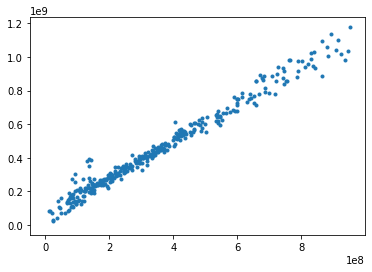

In [47]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test_scale) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [48]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train_scale, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [50]:
#R-square
ridge.score(X_train_scale,y_train)

0.9810647107216333

In [51]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train_scale, y_train)
ridge.score(X_train_scale,y_train)

0.98229754545027

In [52]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train_scale, y_train)
lasso.score(X_train_scale, y_train)

0.9824887766700108

In [53]:
df.columns

Index(['Auction_key', 'Auction_class', 'Claim_price', 'Appraisal_company',
       'Appraisal_date', 'Auction_count', 'Auction_miscarriage_count',
       'Total_land_gross_area', 'Total_land_real_area',
       'Total_land_auction_area', 'Total_building_area',
       'Total_building_auction_area', 'Total_appraisal_price',
       'Minimum_sales_price', 'First_auction_date', 'Final_auction_date',
       'Final_result', 'Creditor', 'addr_do', 'addr_si', 'addr_dong',
       'addr_san', 'addr_etc', 'Apartment_usage', 'Preserve_regist_date',
       'Total_floor', 'Current_floor', 'Share_auction_YorN', 'road_name',
       'Close_date', 'Close_result', 'point.y', 'point.x', 'Hammer_price',
       'Gain', 'gain_or_loss', '개별', '일괄', '일반', 'date', 'year'],
      dtype='object')

## 3. MSE구하기
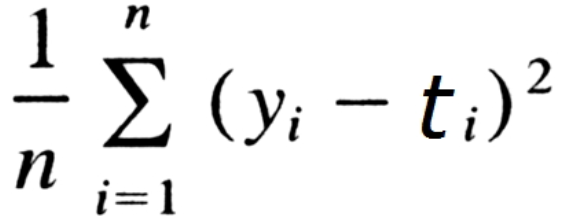

In [59]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train_scale))

827333479498739.4

In [60]:
def mean_squared_error(y, t):
    return ((y-t)**2).mean(axis=None)


In [61]:
mean_squared_error(y_train, model.predict(X_train_scale))

827333479498739.1